In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ravi72munde/uber-lyft-cab-prices")

print("Path to dataset files:", path)

100%|██████████| 73.5M/73.5M [00:30<00:00, 2.53MB/s]

Extracting files...


Path to dataset files: C:\Users\LAP TECHNOLOGY\.cache\kagglehub\datasets\ravi72munde\uber-lyft-cab-prices\versions\4


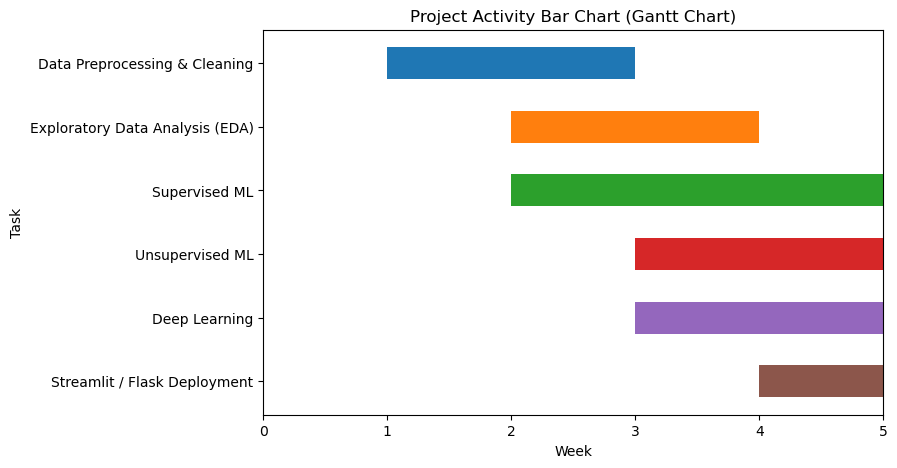

In [1]:
import matplotlib.pyplot as plt

# Data
tasks = [
    "Data Preprocessing & Cleaning",
    "Exploratory Data Analysis (EDA)",
    "Supervised ML",
    "Unsupervised ML",
    "Deep Learning",
    "Streamlit / Flask Deployment"
]
start = [1, 2, 2, 3, 3, 4]
duration = [2, 2, 3, 2, 2, 1]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
for i, task in enumerate(tasks):
    ax.barh(task, duration[i], left=start[i], height=0.5)

ax.set_xlabel("Week")
ax.set_ylabel("Task")
ax.set_title("Project Activity Bar Chart (Gantt Chart)")
ax.set_xlim(0, 5)
plt.gca().invert_yaxis()  # Task 1 at top
plt.show()


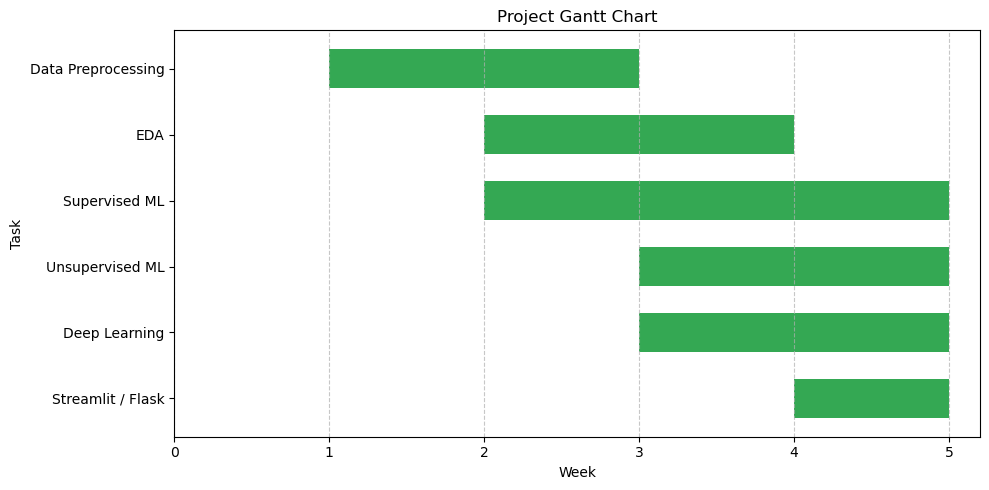

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. بيانات المشروع الخاصة بك
tasks = [
    'Streamlit / Flask', # تم عكس الترتيب ليظهر الأول في الأعلى
    'Deep Learning',
    'Unsupervised ML',
    'Supervised ML',
    'EDA',
    'Data Preprocessing'
]
start_weeks = [4, 3, 3, 2, 2, 1] # أسابيع البدء (معكوسة لتطابق المهام)
durations = [1, 2, 2, 3, 2, 2] # المدد (معكوسة لتطابق المهام)

# 2. إعداد المخطط
fig, ax = plt.subplots(figsize=(10, 5)) # (fig) هو الشكل بالكامل, (ax) هو المخطط نفسه

# 3. رسم الأشرطة الأفقية (barh)
#  y = هو الموضع الرأسي (اسم المهمة)
#  width = هو "المدة" (Duration)
#  left = هو "أسبوع البدء" (Start Week)
ax.barh(tasks, durations, left=start_weeks, align='center', height=0.6, color='#34A853')

# 4. تنسيق المحاور والشبكة
ax.set_xlabel('Week')
ax.set_ylabel('Task')
ax.set_title('Project Gantt Chart')

# ضبط علامات المحور السيني (X-axis) ليظهر أرقام الأسابيع بوضوح
max_week = max([start + dur for start, dur in zip(start_weeks, durations)]) + 1
ax.set_xticks(range(0, max_week)) # إظهار علامات من 0 إلى نهاية المشروع
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d')) # إظهار الأرقام كأعداد صحيحة

# إضافة شبكة (Grid) رأسية لتسهيل القراءة
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# 5. إظهار المخطط
plt.tight_layout() # لضمان ظهور كل العناوين بشكل جيد
plt.show()

In [5]:
import plotly.express as px
import pandas as pd

# 1. إعداد البيانات (يفضل استخدام Pandas DataFrame)
# نحتاج لإضافة عمود "Finish" (الانتهاء)
data = [
    {"Task": "Data Preprocessing", "Start": 1, "Duration": 2},
    {"Task": "EDA", "Start": 2, "Duration": 2},
    {"Task": "Supervised ML", "Start": 2, "Duration": 3},
    {"Task": "Unsupervised ML", "Start": 3, "Duration": 2},
    {"Task": "Deep Learning", "Start": 3, "Duration": 2},
    {"Task": "Streamlit / Flask", "Start": 4, "Duration": 1},
]

# تحويل القائمة إلى DataFrame
df = pd.DataFrame(data)

# حساب "الانتهاء"
# ملاحظة: الانتهاء هو "البدء + المدة". 
# مثلاً: يبدأ الأسبوع 1 لمدة أسبوعين -> ينتهي بنهاية الأسبوع 2.
# لكن plotly ترسم حتى نقطة النهاية، لذا سنجعلها "Start + Duration"
df['Finish'] = df['Start'] + df['Duration']

# 2. طباعة الـ DataFrame للتأكد (خطوة اختيارية)
print("Project Data:")
print(df)
print("-" * 20)

# 3. رسم المخطط التفاعلي
fig = px.timeline(
    df,
    x_start="Start",     # العمود الذي يمثل بداية المهمة
    x_end="Finish",       # العمود الذي يمثل نهاية المهمة
    y="Task",            # العمود الذي يمثل اسم المهمة
    title="Project Gantt Chart (Interactive)",
    color="Task"         # (اختياري) تلوين كل مهمة بلون مختلف
)

# 4. عكس المحور الرأسي (Y-axis) ليطابق ترتيب الجدول
fig.update_yaxes(autorange="reversed")

# 5. ضبط المحور السيني (X-axis) ليظهر أرقام الأسابيع بوضوح
max_week = df['Finish'].max() + 1
fig.update_layout(
    xaxis=dict(
        title='Week',
        tickmode='linear',
        tick0=0,
        dtick=1  # علامة كل 1 أسبوع
    )
)

# 6. إظهار المخطط (سيفتح في متصفحك أو نافذة العرض)
fig.show()

Project Data:
                 Task  Start  Duration  Finish
0  Data Preprocessing      1         2       3
1                 EDA      2         2       4
2       Supervised ML      2         3       5
3     Unsupervised ML      3         2       5
4       Deep Learning      3         2       5
5   Streamlit / Flask      4         1       5
--------------------


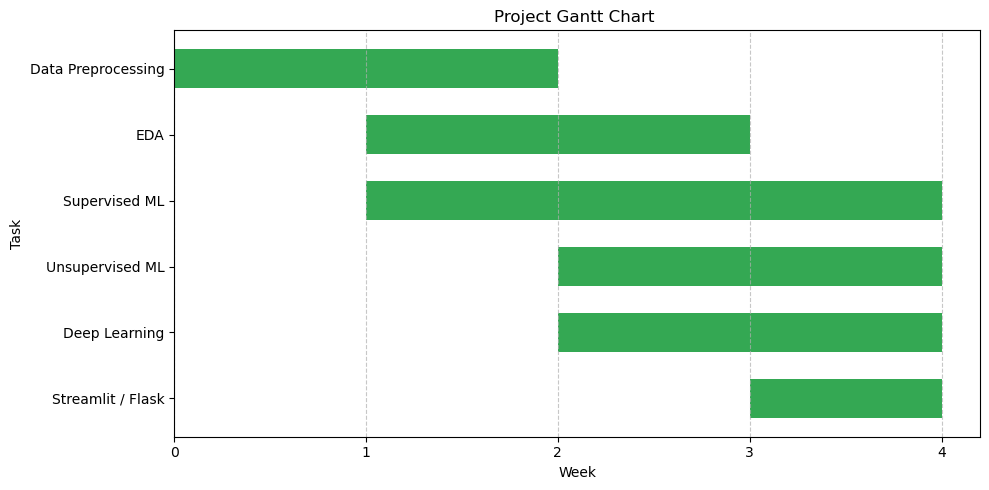

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 1. بيانات المشروع المعدلة (البدء من 0)
tasks = [
    'Streamlit / Flask', # تم عكس الترتيب
    'Deep Learning',
    'Unsupervised ML',
    'Supervised ML',
    'EDA',
    'Data Preprocessing'
]
# تم طرح 1 من كل أسبوع بدء
start_weeks = [3, 2, 2, 1, 1, 0] 
durations = [1, 2, 2, 3, 2, 2] # المدد كما هي

# 2. إعداد المخطط
fig, ax = plt.subplots(figsize=(10, 5))

# 3. رسم الأشرطة الأفقية (barh)
ax.barh(tasks, durations, left=start_weeks, align='center', height=0.6, color='#34A853')

# 4. تنسيق المحاور والشبكة
ax.set_xlabel('Week')
ax.set_ylabel('Task')
ax.set_title('Project Gantt Chart ')

# ضبط علامات المحور السيني (X-axis)
max_week = max([start + dur for start, dur in zip(start_weeks, durations)]) + 1
ax.set_xticks(range(0, max_week))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# 5. إظهار المخطط
plt.tight_layout()
plt.show()

In [5]:
!pip install graphviz

In [8]:
import graphviz

# 1. إنشاء "رسم بياني موجه" (Directed Graph)
# rankdir='LR' تعني أن الرسم سيتدفق من اليسار لليمين (Left-to-Right)
dot = graphviz.Digraph(comment='Project Activity Network', format='png')
dot.attr(rankdir='LR')

# 2. تعريف العقد (Nodes)
# سنستخدم 'shape=box' للمهام (Tasks) مثل صورتك
# سنستخدم 'shape=ellipse' للبداية والنهاية
dot.node('Start', 'Start', shape='ellipse')
dot.node('Finish', 'Finish', shape='ellipse')

# تعريف المهام مع مدتها (Duration)
# \n هو لإنشاء سطر جديد داخل المربع
dot.node('T1', 'Data Preprocessing\n(2 weeks)', shape='box')
dot.node('T2', 'EDA\n(2 weeks)', shape='box')
dot.node('T3', 'Supervised ML\n(3 weeks)', shape='box')
dot.node('T4', 'Unsupervised ML\n(2 weeks)', shape='box')
dot.node('T5', 'Deep Learning\n(2 weeks)', shape='box')
dot.node('T6', 'Streamlit / Flask\n(1 week)', shape='box')

# 3. تعريف الاعتماديات (Edges / Arrows)
# بناءً على الافتراضات التي وضعناها
dot.edge('Start', 'T1')

dot.edge('T1', 'T2')
dot.edge('T1', 'T3')
dot.edge('T1', 'T4')
dot.edge('T1', 'T5')

dot.edge('T2', 'T6')

# كل المسارات يجب أن تنتهي عند 'Finish'
dot.edge('T3', 'Finish')
dot.edge('T4', 'Finish')
dot.edge('T5', 'Finish')
dot.edge('T6', 'Finish')

# 4. حفظ وعرض المخطط
# سيقوم بإنشاء ملف باسم 'project_network.gv' والملف 'project_network.png'
# view=True ستحاول فتح الصورة تلقائياً
try:
    dot.render('project_network', view=True)
    print("تم إنشاء المخطط بنجاح باسم 'project_network.png'")
except Exception as e:
    print(f"حدث خطأ: {e}")
    print("يرجى التأكد من تثبيت Graphviz كبرنامج على نظامك وليس فقط كمكتبة بايثون.")

حدث خطأ: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH
يرجى التأكد من تثبيت Graphviz كبرنامج على نظامك وليس فقط كمكتبة بايثون.
